# 🧠 Titanic Dataset Exploratory Data Analysis

This notebook performs an in-depth EDA on the Titanic dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

sns.set(style="whitegrid")


In [2]:
# Upload the dataset first or place in the same folder
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Structure: Variables and Data Types

In [3]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#  Check Missing Values


In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Univariate Analysis (Distribution of one variable)

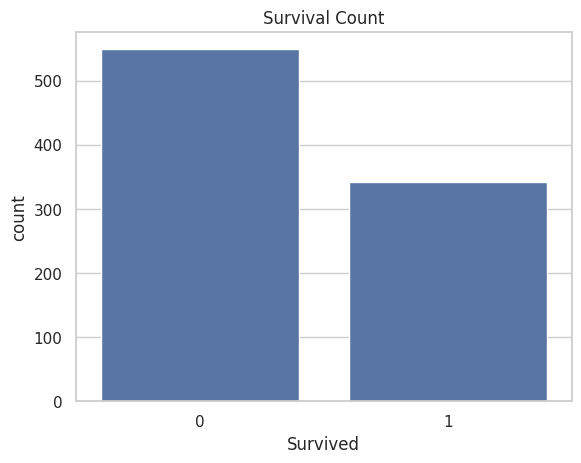

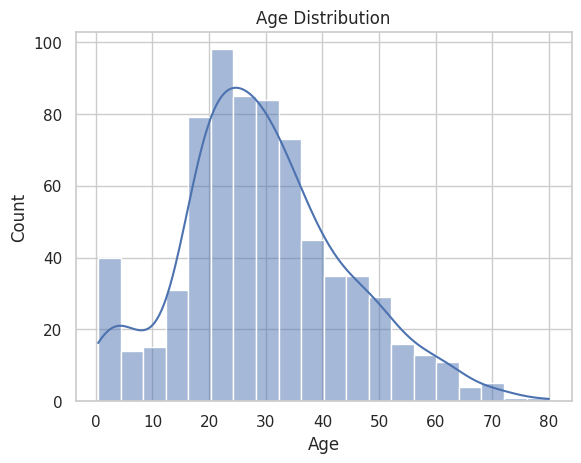

In [5]:
# Survival Count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Age Distribution
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()


# Bivariate Analysis (Relationship between two variables)

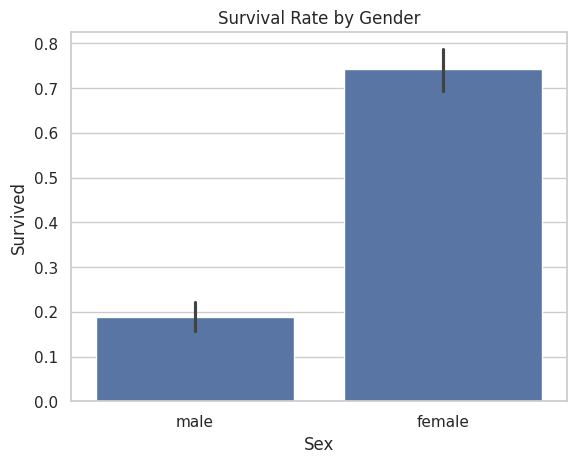

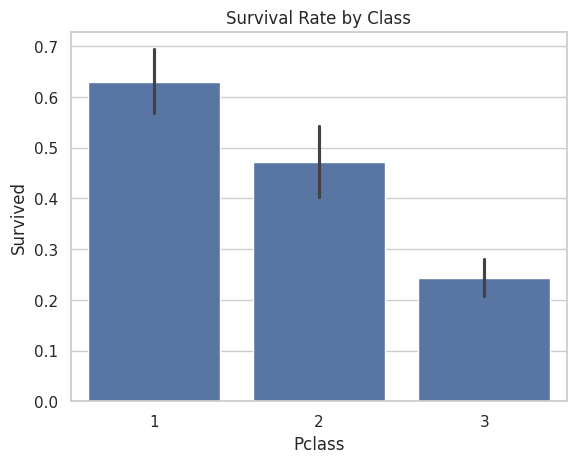

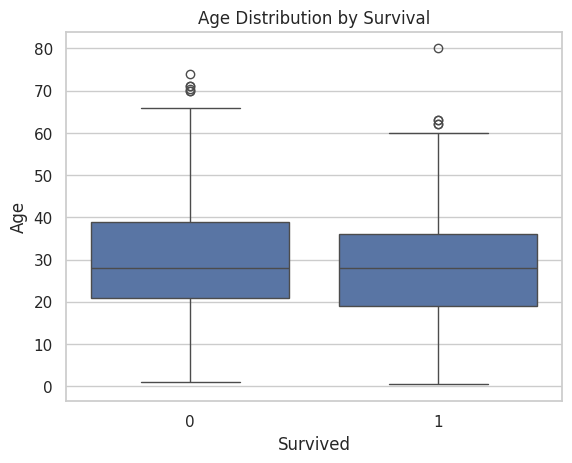

In [6]:
# Gender vs Survival
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Class vs Survival
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

# Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()


#  Hypothesis Testing

In [7]:
# Gender survival hypothesis
male_survival = df[df['Sex'] == 'male']['Survived']
female_survival = df[df['Sex'] == 'female']['Survived']

t_stat, p_val = ttest_ind(female_survival, male_survival)
print("T-statistic:", t_stat, " | P-value:", p_val)

if p_val < 0.05:
    print("✅ Statistically significant difference between male and female survival.")
else:
    print("❌ No significant difference.")


T-statistic: 19.297816550123354  | P-value: 1.4060661308802594e-69
✅ Statistically significant difference between male and female survival.


In [8]:
# Class vs Survival - Chi-square test
contingency = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p, _, _ = chi2_contingency(contingency)
print("Chi-square:", chi2, "| P-value:", p)

if p < 0.05:
    print("✅ Passenger class has a significant effect on survival.")
else:
    print("❌ No significant relationship.")


Chi-square: 102.88898875696056 | P-value: 4.549251711298793e-23
✅ Passenger class has a significant effect on survival.


#  Identify Trends and Patterns



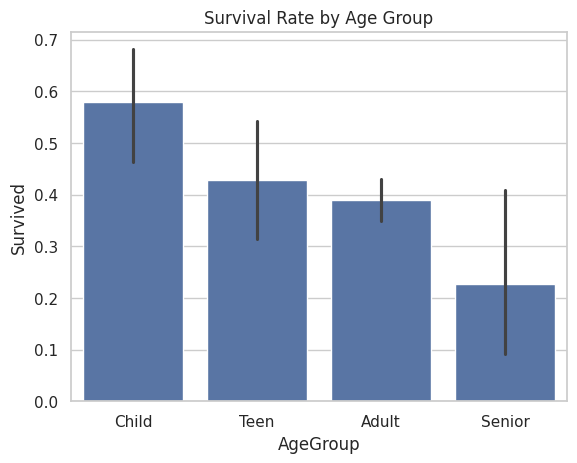

In [9]:
# Age Group survival
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,60,80], labels=['Child','Teen','Adult','Senior'])
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()


# Detect Anomalies or Outliers

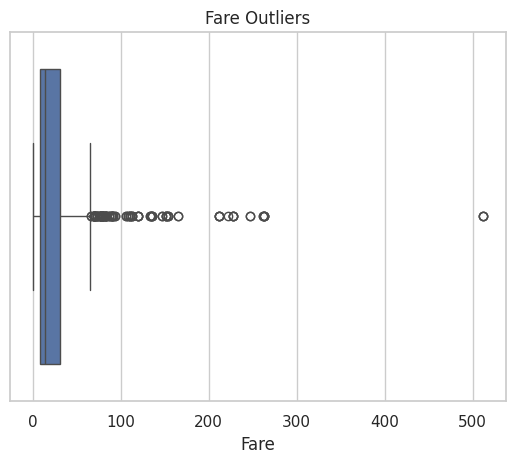

In [10]:
# Outliers in Fare
sns.boxplot(x=df['Fare'])
plt.title('Fare Outliers')
plt.show()


### ⚠️ Potential Data Issues

- Missing values in 'Age', 'Cabin', 'Embarked'

- Cabin has too many missing values – consider dropping it

- Convert categorical columns before modeling
